In [2]:
#acerage and median length of each sentiment category , plot histogram

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('poem_data.csv')

In [3]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [4]:
#calculate length
df['length']= df['Poem'].apply (lambda x: len(str(x).split()))

In [5]:
stats = df.groupby('Genre')['length'].agg(['mean','median'])
#Group by genre and computed mean and median

print(stats)

                  mean  median
Genre                         
Affection    48.224066    50.0
Death        47.785425    50.0
Environment  44.337302    50.0
Music        46.059761    50.0


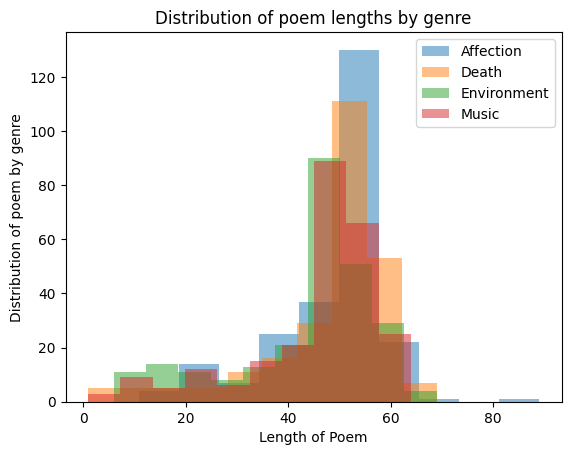

In [6]:
df.groupby('Genre')['length'].plot(kind='hist',alpha=0.5,legend=True)
plt.xlabel('Length of Poem')
plt.ylabel('Distribution of poem by genre')
plt.title('Distribution of poem lengths by genre')
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

#identifying and plotting top 20 most frequent bigrams , classifying into positive and negative

In [8]:
#Split positive and negative classes

pos_texts = df[df['Genre'].isin(['Affection','Music'])]['Poem']
neg_texts = df[df['Genre'].isin(['Death','Environment'])]['Poem']

<Figure size 1000x600 with 0 Axes>

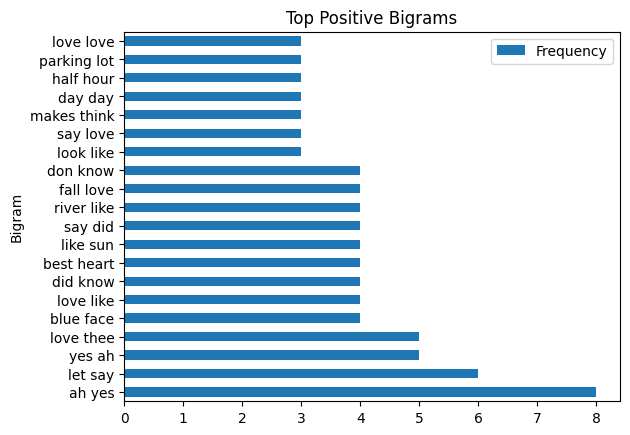

<Figure size 1000x600 with 0 Axes>

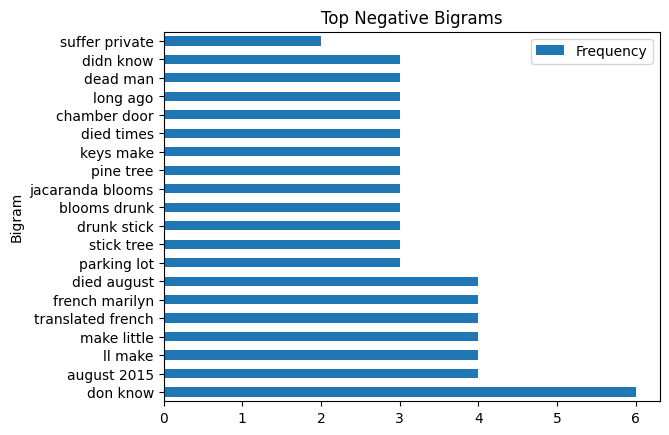

In [9]:
#Function to get top bigrams

def top_20_bigrams(texts,n=20):
  # Fill NaN values with empty strings
  texts = texts.fillna('')
  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(texts)
  bag_of_words = vec.transform(texts)
  sum_of_words = bag_of_words.sum(axis=0)
  word_freq = [(word,sum_of_words[0,idx])for word , idx in vec.vocabulary_.items()]
  return sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]


top_pos = top_20_bigrams(pos_texts)
top_neg = top_20_bigrams(neg_texts)

pos_df = pd.DataFrame(top_pos,columns=['Bigram','Frequency'])
neg_df = pd.DataFrame(top_neg,columns=['Bigram','Frequency'])


plt.figure(figsize=(10,6))
pos_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Positive Bigrams')
plt.show()

plt.figure(figsize=(10,6))
neg_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Negative Bigrams')
plt.show()

In [10]:
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


# --- (i) Basic Cleaning ---
def clean_text(text):
    # Convert non-string inputs to string
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers & special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Before/After example
print("Before:", df['Poem'].iloc[0])
print("After:", clean_text(df['Poem'].iloc[0]))

# --- (ii) Tokenization + Lemmatization ---
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = word_tokenize(text)  # tokenization
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Apply on 5 random samples
samples = df['Poem'].sample(5, random_state=42)
for i, s in enumerate(samples):
    print(f"\nSample {i+1}:")
    print("Original:", s)
    print("Processed:", tokenize_lemmatize(clean_text(s)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Before: nan
After: nan

Sample 1:
Original: What is it you feel I asked Kurt when you listen toRavel’s String Quartet in F-major, his face was so lit upand I wondered, “the music is unlike the world I liveor think in, it’s from somewhere else, unfamiliar and unknown,not because it is relevant to the familiar and comfortable,but
Processed: ['what', 'is', 'it', 'you', 'feel', 'i', 'asked', 'kurt', 'when', 'you', 'listen', 'toravels', 'string', 'quartet', 'in', 'fmajor', 'his', 'face', 'wa', 'so', 'lit', 'upand', 'i', 'wondered', 'the', 'music', 'is', 'unlike', 'the', 'world', 'i', 'liveor', 'think', 'in', 'it', 'from', 'somewhere', 'else', 'unfamiliar', 'and', 'unknownnot', 'because', 'it', 'is', 'relevant', 'to', 'the', 'familiar', 'and', 'comfortablebut']

Sample 2:
Original: I have been a spendthrift Dropping from lazy fingers Quiet coloured hours, Fluttering away from me Like oak and beech leaves in October.I have lived keenly and wastefully, Like a bush or a sun insect— Lived sensua

             count  average  median
Genre                              
Affection      241   272.78   283.0
Death          244   276.50   293.0
Environment    252   261.45   288.0
Music          250   265.86   286.5


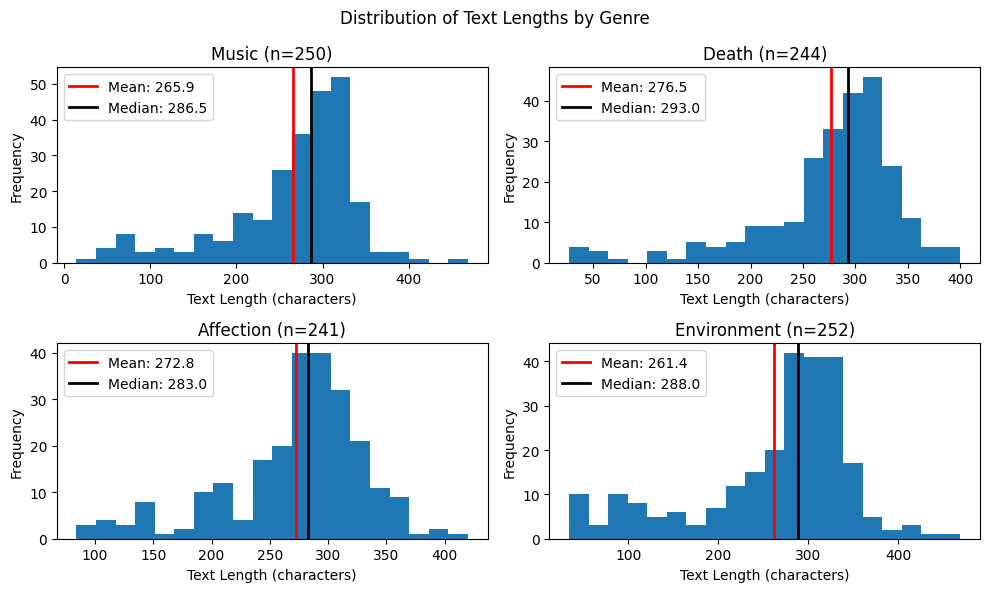

Positive Bi-grams  [(('in', 'the'), 124), (('of', 'the'), 101), (('on', 'the'), 52), (('to', 'the'), 44), (('in', 'a'), 43), (('at', 'the'), 42), (('it', 's'), 40), (('i', 'am'), 39), (('i', 'm'), 38), (('when', 'i'), 33), (('in', 'my'), 33), (('and', 'the'), 33), (('from', 'the'), 31), (('for', 'the'), 28), (('is', 'a'), 26), (('i', 'was'), 25), (('is', 'the'), 24), (('to', 'be'), 24), (('it', 'is'), 24), (('with', 'the'), 24)]
Negative Bi-grams  [(('in', 'the'), 150), (('of', 'the'), 107), (('on', 'the'), 61), (('and', 'the'), 54), (('to', 'the'), 44), (('in', 'a'), 43), (('from', 'the'), 40), (('i', 'have'), 32), (('i', 'am'), 32), (('like', 'a'), 29), (('at', 'the'), 29), (('through', 'the'), 24), (('for', 'the'), 24), (('and', 'i'), 24), (('it', 'is'), 23), (('i', 'm'), 22), (('where', 'the'), 22), (('of', 'a'), 21), (('as', 'a'), 21), (('the', 'night'), 21)]


In [11]:
# Load the data
df = pd.read_csv('poem_data.csv')

# Remove rows with null poems
df = df.dropna(subset=['Poem'])

# Calculate text length for each poem
df['text_length'] = df['Poem'].str.len()

# Calculate statistics by genre
genre_stats = df.groupby('Genre')['text_length'].agg([
    ('count', 'count'),
    ('average', 'mean'),
    ('median', 'median')
]).round(2)

# print
print(genre_stats)




# Create histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Distribution of Text Lengths by Genre')

genres = df['Genre'].unique()

for idx, (ax, genre) in enumerate(zip(axes.flat, genres)):
    genre_data = df[df['Genre'] == genre]['text_length']

    # Create histogram
    n, bins, patches = ax.hist(genre_data, bins=20)

    # Add vertical lines for mean and median
    mean_val = genre_data.mean()
    median_val = genre_data.median()

    ax.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')

    # Labels and title
    ax.set_title(f'{genre} (n={len(genre_data)})')
    ax.set_xlabel('Text Length (characters)')
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()



# Define positive and negative classes based on genre
# Positive: Affection, Music
# Negative: Death, Environment
positive_genres = ['Affection', 'Music']
negative_genres = ['Death', 'Environment']

# Create positive and negative class dataframes
df_positive = df[df['Genre'].isin(positive_genres)]
df_negative = df[df['Genre'].isin(negative_genres)]



def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Tokenize
    tokens = text.strip().split()
    return tokens

def get_bigrams(text):
    tokens = preprocess_text(text)
    bigrams = []
    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i + 1]))
    return bigrams

# create bigrams function
def get_top_bigrams(df_class, n=20):
    all_bigrams = []
    for poem in df_class['Poem']:
        if poem:
            all_bigrams.extend(get_bigrams(poem))

    # Count bigrams
    bigram_counts = Counter(all_bigrams)

    # Get top n bigrams
    top_bigrams = bigram_counts.most_common(n)
    return top_bigrams


    # Print Top 20 positive bigrams
positive_bigrams = get_top_bigrams(df_positive, 20)
print("Positive Bi-grams ", positive_bigrams)


# Print Top 20 negative bigrams
negative_bigrams = get_top_bigrams(df_negative, 20)
print("Negative Bi-grams ", negative_bigrams)

In [12]:
##2a

import numpy as np

# Store original data for comparison
df['Original_Poem'] = df['Poem'].copy()

def text_cleaning(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuation
    # Keep only alphabets and spaces
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Remove extra whitespaces (multiple spaces to single space)
    text = re.sub(r'\s+', ' ', text)

    # Strip leading and trailing spaces
    text = text.strip()
    return text



    # Apply cleaning to all poems
df['Cleaned_Poem'] = df['Poem'].apply(text_cleaning)

# Show 3 random samples
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(df.index, 3, replace=False)

for idx, i in enumerate(sample_indices, 1):
    print(f"\n{'='*70}")
    print(f"SAMPLE {idx} - Genre: {df.loc[i, 'Genre']}")
    print(f"{'='*70}")

    original = df.loc[i, 'Original_Poem'][:200]  # Show first 200 chars
    cleaned = df.loc[i, 'Cleaned_Poem'][:200]

    print("\nBEFORE CLEANING:")
    print("-" * 50)
    print(original + ("..." if len(df.loc[i, 'Original_Poem']) > 200 else ""))

    print("\nAFTER CLEANING:")
    print("-" * 50)
    print(cleaned + ("..." if len(df.loc[i, 'Cleaned_Poem']) > 200 else ""))




    #2b


    # function that returns tokenized and lemmatized tokens
def tokenize_and_lemmatize(sentence):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the sentence
    tokens = word_tokenize(sentence.lower())

    # Lemmatize each token
    lemmatized_tokens = []
    for token in tokens:
        # Lemmatize with appropriate POS tag (noun by default)
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)

    return lemmatized_tokens



    import random
# Set seed for reproducibility
np.random.seed(42)

# Select 5 random samples
sample_indices = np.random.choice(df.index, 5, replace=False)

# Process each sample
results = []
for idx, i in enumerate(sample_indices, 1):
    # Get the poem text (first 200 characters for display)
    poem_text = df.loc[i, 'Poem']
    genre = df.loc[i, 'Genre']
    result = tokenize_and_lemmatize(poem_text)
    print("=="*50)
    print(f"ORIGINAL : {poem_text}")
    print(" ")
    print(f"PROCESSED : {result}")
    print("=="*50)


SAMPLE 1 - Genre: Death

BEFORE CLEANING:
--------------------------------------------------
He saw her from the bottom of the stairs Before she saw him.She was starting down, Looking back over her shoulder at some fear. She took a doubtful step and then undid it To raise herself and look aga...

AFTER CLEANING:
--------------------------------------------------
he saw her from the bottom of the stairs before she saw him she was starting down looking back over her shoulder at some fear she took a doubtful step and then undid it to raise herself and look again...

SAMPLE 2 - Genre: Music

BEFORE CLEANING:
--------------------------------------------------
Onliest man who lay hands on me. Pointer finger pad between my eyes. Pinky knuckle cool on cheekbone. God of precision, blade at my throat,for a half hour, you love me this way. Together we discover w...

AFTER CLEANING:
--------------------------------------------------
onliest man who lay hands on me pointer finger pad between my ey

In [18]:
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)


# Count Nouns
def count_nouns(texts):
    noun_count = 0
    noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']  # Noun POS tags

    for text in texts:
        # Tokenize and POS tag
        tokens = word_tokenize(text)
        tagged = nltk.pos_tag(tokens)

        # Count nouns
        for word, tag in tagged:
            if tag in noun_tags:
                noun_count += 1

    return noun_count



# get all target classes in an array
targets = df['Genre'].unique()


for target in targets:
    texts = df[df['Genre'] == target]['Poem']
    noun_cnts = count_nouns(texts)
    print(f' Noun count for {target} is {noun_cnts}')


#2c ii)
# drop any blank rows
df = df.dropna(subset=['Poem'])

# Tokenize poems
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    return [token for token in tokens if token not in stop_words and token.isalpha()]

# Create corpus of tokenized poems
corpus = [preprocess_text(poem) for poem in df['Poem']]

embedding_dim = 100

# Train Word2Vec model
word2vec = Word2Vec(sentences=corpus,
                 min_count=5,
                 window=5,
                 vector_size=embedding_dim,
                 sg=0,           # Use CBOW
                 seed=42)


# Find similar words to "soul"
print("\n5 most similar words to 'soul':")
try:
    similar_to_soul = word2vec.wv.most_similar('soul', topn=5)
    for word, similarity in similar_to_soul:
        print(f"  {word}: {similarity:.4f}")
except KeyError:
    print("  'soul' not in vocabulary (appears less than 5 times)")





# Find similar words to "light"
print("\n5 most similar words to 'light':")
try:
    similar_to_light = word2vec.wv.most_similar('light', topn=5)
    for word, similarity in similar_to_light:
        print(f"  {word}: {similarity:.4f}")
except KeyError:
    print("  'light' not in vocabulary (appears less than 5 times)")

 Noun count for Music is 3563
 Noun count for Death is 3504
 Noun count for Affection is 3482
 Noun count for Environment is 3664

5 most similar words to 'soul':
  night: 0.9846
  old: 0.9834
  could: 0.9830
  things: 0.9829
  one: 0.9826

5 most similar words to 'light':
  like: 0.9965
  one: 0.9962
  still: 0.9958
  go: 0.9958
  sun: 0.9956


In [14]:
!pip install gensim

In [21]:
#Section C

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Applying the cleaning text
df['Cleaned_Poem'] = df['Poem'].apply(text_cleaning)

# Prepare data
X = df['Cleaned_Poem']
y = df['Genre']


# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
print("Vectorizing text using TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes classifier
print("Training Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")




#Preprocessing for deep learning

# Tokenize text using Keras Tokenizer
tokenizer = Tokenizer()

# Convert text to integer sequences
tokenizer.fit_on_texts(df['Cleaned_Poem'])
word_index = tokenizer.word_index

# Convert text to integer sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned_Poem'])

# Convert to padded sequences
max_len = max(len(seq) for seq in sequences)

# Pad all sequences to the same length (max_len)
# 'post' padding adds zeros at the end of the sequence
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Label encode the sentiments
le = LabelEncoder()
y_encoded = le.fit_transform(df['Genre'])
one_hot_labels = to_categorical(y_encoded)

Vectorizing text using TF-IDF...
Training Naive Bayes classifier...

Accuracy: 0.3737
F1-Score (weighted): 0.3688


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       918,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,500 (3.50 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 918,500 (3.50 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       918,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,500 (3.50 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 918,500 (3.50 MB)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.2647 - loss: 1.3868 - val_accuracy: 0.2785 - val_loss: 1.3842
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.2887 - loss: 1.3844 - val_accuracy: 0.2278 - val_loss: 1.3937
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.2555 - loss: 1.3850 - val_accuracy: 0.2278 - val_loss: 1.3933
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.2815 - loss: 1.3852 - val_accuracy: 0.2911 - val_loss: 1.3732
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.2978 - loss: 1.3744 - val_accuracy: 0.2405 - val_loss: 1.4009


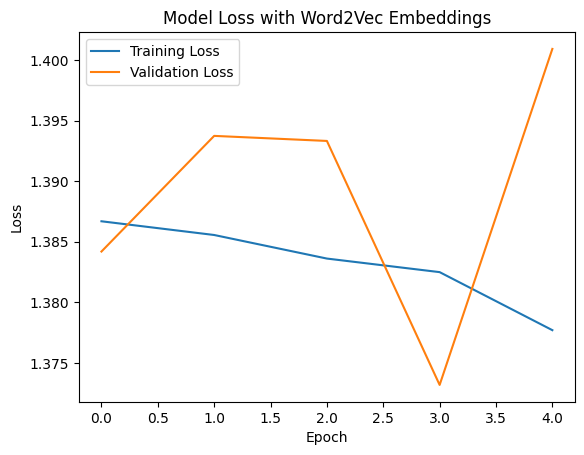

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2328 - loss: 1.4048

Test Loss: 1.4040
Test Accuracy: 0.2222


In [24]:
#Build a vanilla LSTM

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


# target classes
num_classes = one_hot_labels.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


embedding_dim = 100

# Create embedding matrix for Keras Embedding layer
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec.wv:
        embedding_matrix[i] = word2vec.wv[word]

# LSTM Model
model = Sequential()

# Embedding layer using pretrained Skip-Gram vectors
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_len, trainable=False))

# LSTM layer to capture sequential patterns
model.add(LSTM(128))

# Output layer with softmax for 5 sentiment classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()



# Model Summary
model.summary()



# Train the model
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=5,
                   validation_split=0.1,
                   verbose=1)



# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Word2Vec Embeddings')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [35]:
# FEB 2025 Paper - Complete solution (Section B + C)
# Run this in a local environment or Google Colab (Colab already has tensorflow).
# If tensorflow is not available, the script will skip LSTM and run a fallback classifier.

import os, re, random
import numpy as np
import pandas as pd

# --- Install / import libraries (uncomment the pip installs if running fresh) ---
# !pip install --quiet gensim nltk scikit-learn
# If using Colab, tensorflow is already installed. Locally, install tensorflow if desired:
# !pip install --quiet tensorflow

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

import nltk
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# -------------------------
# Load dataset
# -------------------------
df = pd.read_csv("poem_data.csv")   # change path if needed
print("Data shape:", df.shape)
print(df.columns)
# Ensure the text column name is 'Poem' and label column is 'Genre' per paper

# -------------------------
# SECTION B 2(a) - Cleaning (16 marks)
# -------------------------

# i) Replace multiple spaces with single space (3 marks)
df['clean'] = df['Poem'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x))

# ii) Remove digits (3 marks)
df['clean'] = df['clean'].apply(lambda x: re.sub(r'\d+', '', x))

# iii) Remove punctuations (5 marks)
df['clean'] = df['clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# iv) Stemming (5 marks)
stemmer = PorterStemmer()
df['stemmed'] = df['clean'].apply(lambda x: " ".join([stemmer.stem(w) for w in word_tokenize(x.lower())]))

# Show before/after for exam answer (print 3 examples)
print("\n--- Before/After examples ---")
for i in range(3):
    print("---")
    print("Before:", df['Poem'].iloc[i])
    print("After (stemmed):", df['stemmed'].iloc[i])

# Save cleaned dataframe (optional)
# df.to_csv("data_cleaned_feb2025.csv", index=False)
# print("Saved cleaned data to data_cleaned_feb2025.csv")

# -------------------------
# SECTION B 2(b) - Word2Vec (Skip-Gram & CBOW) (24 marks)
# -------------------------
sentences = df['stemmed'].fillna("").apply(lambda x: x.split()).tolist()
print("Training sentences count:", len(sentences))

# set seed
seed = 42
random.seed(seed)
np.random.seed(seed)

# i) Skip-Gram Word2Vec (sg=1)
w2v_skip = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, sg=1, epochs=20, seed=seed)
print("Skip-Gram vocab size:", len(w2v_skip.wv.index_to_key))

# ii) CBOW Word2Vec (sg=0)
w2v_cbow = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, sg=0, epochs=20, seed=seed)
print("CBOW vocab size:", len(w2v_cbow.wv.index_to_key))

# iii) & iv) Top-5 similar to 'covid' for both models
target = "covid"
print("\nTop-5 similar (Skip-Gram):")
if target in w2v_skip.wv:
    print(w2v_skip.wv.most_similar(target, topn=5))
else:
    print(f"'{target}' not in Skip-Gram vocab (min_count may have removed it).")

print("\nTop-5 similar (CBOW):")
if target in w2v_cbow.wv:
    print(w2v_cbow.wv.most_similar(target, topn=5))
else:
    print(f"'{target}' not in CBOW vocab (min_count may have removed it).")

# -------------------------
# SECTION C 3(a), 3(b) - CountVectorizer & TF-IDF (8+8 marks)
# -------------------------
cv = CountVectorizer()
X_count = cv.fit_transform(df['stemmed'].fillna(""))
print("CountVectorizer shape:", X_count.shape)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['stemmed'].fillna(""))
print("TF-IDF shape:", X_tfidf.shape)

# -------------------------
# SECTION C 3(c) - LSTM multiclass using Skip-Gram embeddings (15+5+4 = 24 marks)
# Tokenise -> Vectorize (use skipgram) -> Model -> Train -> Print summary/accuracy
# If tensorflow is available, runs LSTM; otherwise runs fallback LogisticRegression on averaged embeddings/TF-IDF
# -------------------------
# Prepare tokenizer and sequences (for LSTM)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Encode labels
labels = pd.Categorical(df['Genre'])
y = to_categorical(labels.codes)

# Tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['stemmed'].astype(str))
sequences = tokenizer.texts_to_sequences(df['stemmed'].astype(str))
maxlen = max(len(s) for s in sequences)
X_seq = pad_sequences(sequences, maxlen=maxlen, padding='post')

print("Vocab size (tokenizer):", len(tokenizer.word_index))
print("Max sequence length:", maxlen)
print("X_seq shape:", X_seq.shape)
print("y shape:", y.shape)

# Try to import tensorflow; if not available, go to fallback
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
    from tensorflow.keras.initializers import Constant

    # Build embedding matrix from Skip-Gram model
    emb_dim = w2v_skip.vector_size
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, emb_dim))
    missing = 0
    for word, idx in tokenizer.word_index.items():
        if word in w2v_skip.wv:
            embedding_matrix[idx] = w2v_skip.wv[word]
        else:
            missing += 1
    print("Missing words from skip-gram embeddings:", missing)

    # Define LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=emb_dim,
                        embeddings_initializer=Constant(embedding_matrix),
                        input_length=maxlen,
                        trainable=False))  # freeze embeddings
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

    # Train (small epochs)
    history = model.fit(X_seq, y, epochs=5, batch_size=32, validation_split=0.2)
    loss, acc = model.evaluate(X_seq, y)
    print("LSTM final accuracy on full data:", acc)

except Exception as e:
    print("\nTensorFlow not available or failed to load. Falling back to non-LSTM classifiers.")
    print("Exception:", e)

    # Fallback A: Logistic Regression on TF-IDF
    print("\nFallback 1: Logistic Regression on TF-IDF")
    X = X_tfidf
    # map labels.codes to integer
    y_int = labels.codes
    clf = LogisticRegression(max_iter=1000)
    scores = cross_val_score(clf, X, y_int, cv=5, scoring='accuracy')
    print("5-fold CV accuracy (TF-IDF + LR):", scores.mean())

    # Fallback B: Logistic Regression on averaged Skip-Gram embeddings
    print("\nFallback 2: Logistic Regression on averaged Skip-Gram Word2Vec")
    def avg_w2v(tokens_list, model, dim):
        vecs = []
        for tokens in tokens_list:
            v = np.zeros(dim)
            count = 0
            for w in tokens:
                if w in model.wv:
                    v += model.wv[w]
                    count += 1
            if count > 0:
                v /= count
            vecs.append(v)
        return np.array(vecs)

    tokens_list = df['stemmed'].fillna("").apply(lambda x: x.split()).tolist()
    X_avg = avg_w2v(tokens_list, w2v_skip, w2v_skip.vector_size)
    clf2 = LogisticRegression(max_iter=1000)
    scores2 = cross_val_score(clf2, X_avg, y_int, cv=5, scoring='accuracy')
    print("5-fold CV accuracy (avg Skip-Gram + LR):", scores2.mean())

# End of script
print("\nScript finished. If running locally/Colab with TensorFlow installed, the LSTM block will execute.")

Data shape: (991, 2)
Index(['Genre', 'Poem'], dtype='object')

--- Before/After examples ---
---
Before: nan
After (stemmed): nan
---
Before:               In the thick brushthey spend the hottest part of the day,              soaking their hoovesin the trickle of mountain water              the ravine hoardson behalf of the oleander.           
After (stemmed): in the thick brushthey spend the hottest part of the day soak their hoovesin the trickl of mountain water the ravin hoardson behalf of the oleand
---
Before:    Storms are generous.                                      Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,             
After (stemmed): storm are gener someth so easi to surrend to sit by the window and then you step out into the garden you were so bore of
Training sentences count: 991
Skip-Gram vocab size: 3055
CBOW vocab size: 3055

Top-5 similar (Skip-Gram):
'covid' not in Skip-Gram vocab (min_coun

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2580 - loss: 1.3839 - val_accuracy: 0.0804 - val_loss: 1.4811
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.3073 - loss: 1.3685 - val_accuracy: 0.1005 - val_loss: 1.5062
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2983 - loss: 1.3583 - val_accuracy: 0.0955 - val_loss: 1.4966
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3253 - loss: 1.3457 - val_accuracy: 0.3417 - val_loss: 1.3090
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2745 - loss: 1.3837 - val_accuracy: 0.0603 - val_loss: 1.5671
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5673 - loss: 1.2489
LSTM final accuracy on full data: 0.25731584429740906

Script finished. If running locally/Colab with TensorFlow installed, the LSTM block will execute.


In [34]:
!pip install tensorflow

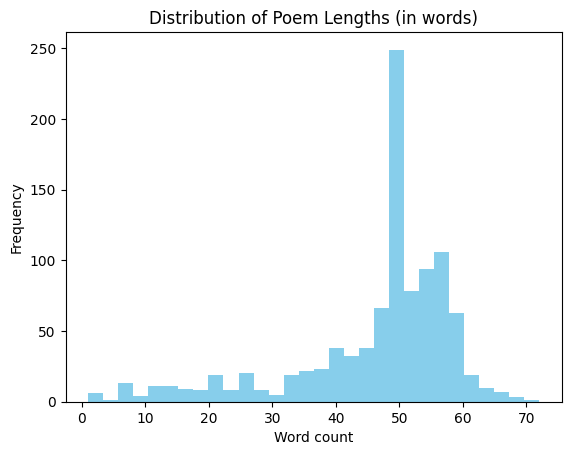

In [36]:
import matplotlib.pyplot as plt
df['word_count'] = df['stemmed'].apply(lambda x: len(x.split()))

plt.hist(df['word_count'], bins=30, color='skyblue')
plt.title("Distribution of Poem Lengths (in words)")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()


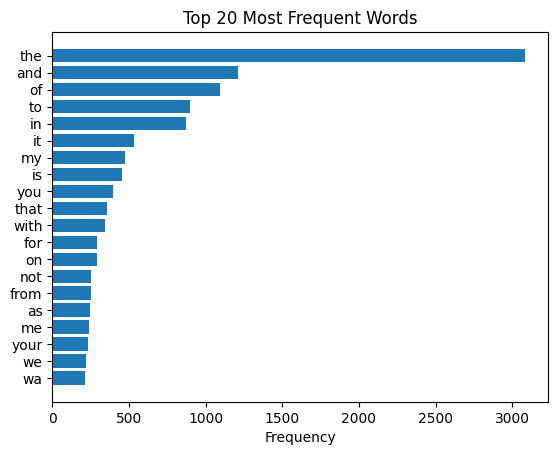

In [37]:
word_freq = np.asarray(X_count.sum(axis=0)).ravel()
words = cv.get_feature_names_out()
top_idx = word_freq.argsort()[-20:][::-1]

plt.barh([words[i] for i in top_idx], word_freq[top_idx])
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()


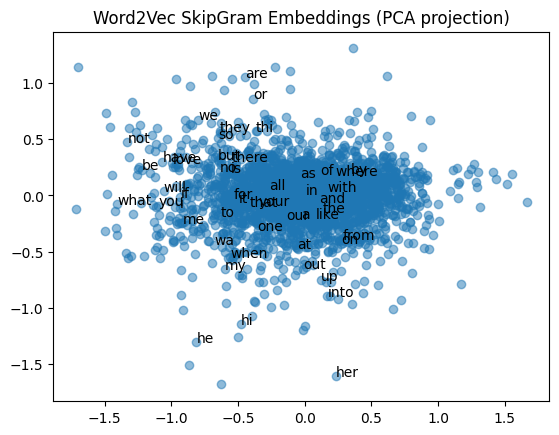

In [38]:
from sklearn.decomposition import PCA

X = w2v_skip.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:,0], result[:,1], alpha=0.5)
for i, word in enumerate(w2v_skip.wv.index_to_key[:50]):  # label top 50
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.title("Word2Vec SkipGram Embeddings (PCA projection)")
plt.show()


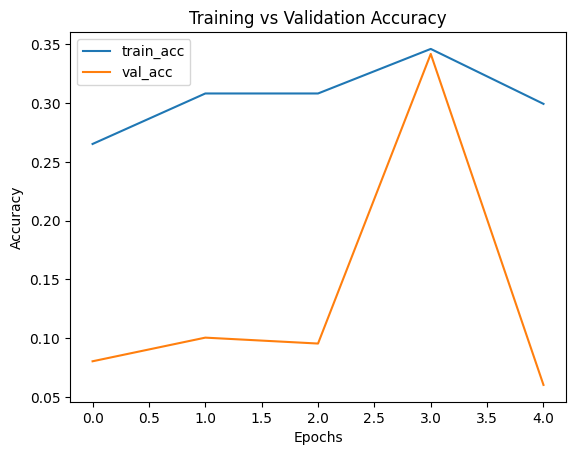

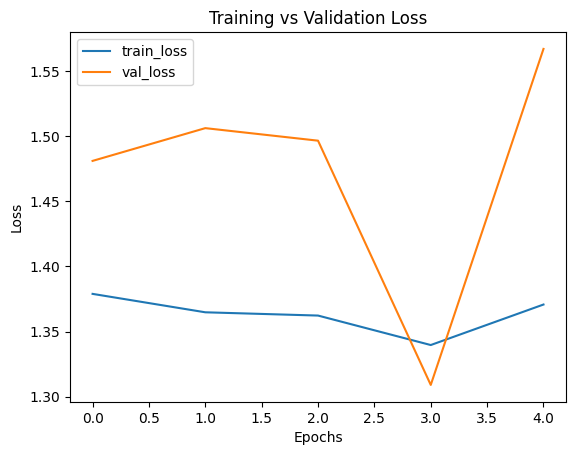

In [39]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



--- Before/After examples ---
Before: Extremely Negative
After : extrem neg 

Before: Positive
After : posit 



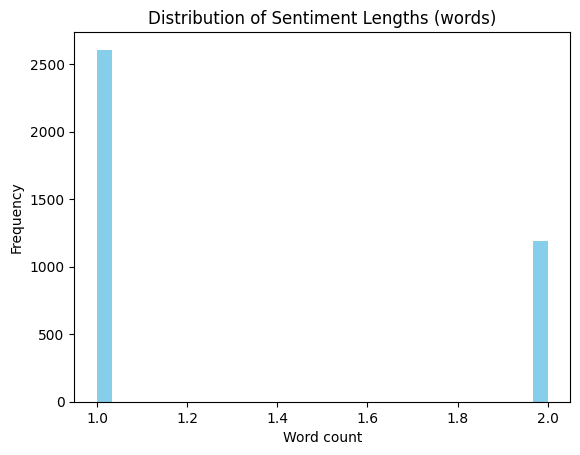


SkipGram vocab size: 4
CBOW vocab size: 4

'covid' not in SkipGram vocab.
'covid' not in CBOW vocab.


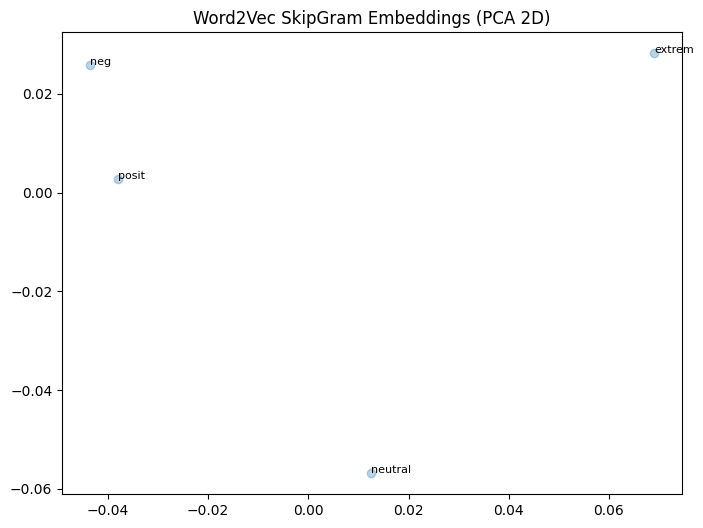


CountVectorizer shape: (3798, 4)
TF-IDF shape: (3798, 4)


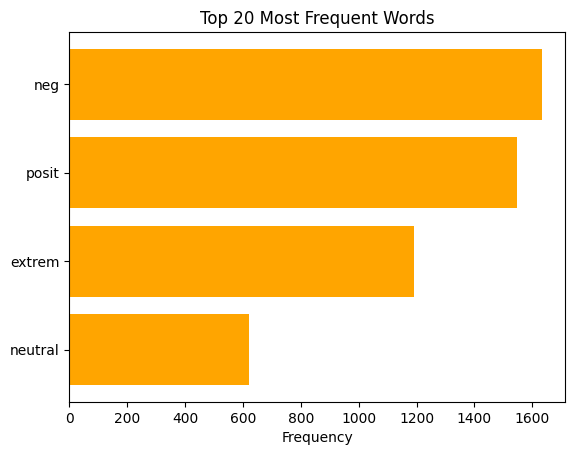

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3090 - loss: 1.5705 - val_accuracy: 0.2342 - val_loss: 1.3568
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6083 - loss: 1.1156 - val_accuracy: 1.0000 - val_loss: 0.6448
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9623 - loss: 0.4899 - val_accuracy: 1.0000 - val_loss: 0.2568
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.2033 - val_accuracy: 1.0000 - val_loss: 0.1457
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.1222 - val_accuracy: 1.0000 - val_loss: 0.0874
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0779

Final LSTM Accuracy: 1.0


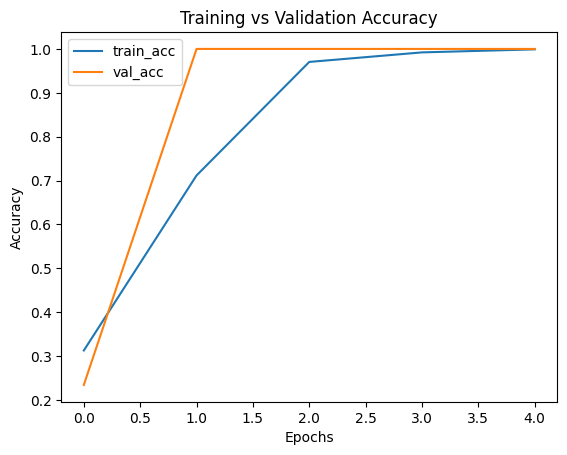

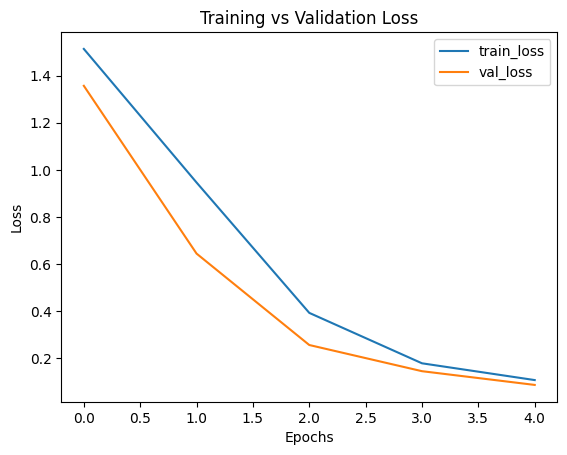

In [44]:
# FEB 2025 ESA NLP Paper – with Visualisations (using 'sentiment' column, lowercase)

import pandas as pd, re, numpy as np, matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.initializers import Constant

# --- Load dataset ---
df = pd.read_csv("data.csv")

# -----------------------
# SECTION B – Cleaning
# -----------------------
# convert to string, lowercase everything
df['clean'] = df['sentiment'].astype(str).str.lower()

# i) Replace multiple spaces
df['clean'] = df['clean'].apply(lambda x: re.sub(r'\s+', ' ', x))

# ii) Remove digits
df['clean'] = df['clean'].apply(lambda x: re.sub(r'\d+', '', x))

# iii) Remove punctuations
df['clean'] = df['clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# iv) Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['clean'].apply(lambda x: " ".join([stemmer.stem(w) for w in word_tokenize(x)]))

print("\n--- Before/After examples ---")
for i in range(2):
    print("Before:", df['sentiment'].iloc[i])
    print("After :", df['stemmed'].iloc[i], "\n")

# 📊 Word count distribution
df['word_count'] = df['stemmed'].apply(lambda x: len(x.split()))
plt.hist(df['word_count'], bins=30, color='skyblue')
plt.title("Distribution of Sentiment Lengths (words)")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.show()

# -----------------------
# SECTION B – Word2Vec
# -----------------------
sentences = df['stemmed'].apply(lambda x: x.split()).tolist()
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1, epochs=20)
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0, epochs=20)

print("\nSkipGram vocab size:", len(skipgram_model.wv.index_to_key))
print("CBOW vocab size:", len(cbow_model.wv.index_to_key))

# Top-5 similar for 'covid'
target = "covid"
if target in skipgram_model.wv:
    print("\nSkipGram similar to 'covid':", skipgram_model.wv.most_similar(target, topn=5))
else:
    print("\n'covid' not in SkipGram vocab.")

if target in cbow_model.wv:
    print("CBOW similar to 'covid':", cbow_model.wv.most_similar(target, topn=5))
else:
    print("'covid' not in CBOW vocab.")

# 📊 PCA projection of embeddings
X = skipgram_model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1], alpha=0.3)
for i, word in enumerate(skipgram_model.wv.index_to_key[:30]):
    plt.annotate(word, xy=(result[i,0], result[i,1]), fontsize=8)
plt.title("Word2Vec SkipGram Embeddings (PCA 2D)")
plt.show()

# -----------------------
# SECTION C – CountVectorizer & TF-IDF
# -----------------------
cv = CountVectorizer()
X_count = cv.fit_transform(df['stemmed'])
print("\nCountVectorizer shape:", X_count.shape)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['stemmed'])
print("TF-IDF shape:", X_tfidf.shape)

# 📊 Top 20 frequent words
word_freq = np.asarray(X_count.sum(axis=0)).ravel()
words = cv.get_feature_names_out()
top_idx = word_freq.argsort()[-20:][::-1]
plt.barh([words[i] for i in top_idx], word_freq[top_idx], color='orange')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

# -----------------------
# SECTION C – LSTM Classifier
# -----------------------
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['stemmed'])
sequences = tokenizer.texts_to_sequences(df['stemmed'])
X_seq = pad_sequences(sequences, padding='post')
labels = pd.Categorical(df['sentiment'])   # keep Genre as target
y = to_categorical(labels.codes)

# Embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in skipgram_model.wv:
        embedding_matrix[i] = skipgram_model.wv[word]

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix),
                    input_length=X_seq.shape[1], trainable=False))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_seq, y, epochs=5, batch_size=32, validation_split=0.2)
loss, acc = model.evaluate(X_seq, y)
print("\nFinal LSTM Accuracy:", acc)

# 📊 Training curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1) What is Word Embedding? What is Pre-trained Word Embedding? What are the advantages of using pre-trained word embeddings?

Word embedding is representing words as dense numerical vectors in continuous space where semantically similar words are closer.

Pre-trained embeddings are word vectors trained on large corpora (e.g., Word2Vec, GloVe).

Advantages: (i) Save training time & resources, (ii) Improve performance by leveraging semantic/grammatical patterns from large data, (iii) Help with small datasets via transfer learning.

2) What is Word2Vec? Explain different types/techniques of Word2Vec with example.

Word2Vec is a shallow neural model that learns word embeddings by predicting word contexts.

CBOW (Continuous Bag of Words): predicts a target word from its context. Example: context = [“I”, “playing”, “football”] → predicts “am”.

Skip-Gram: predicts surrounding context given a word. Example: input “football” → predicts “play”, “game”, “team”.

3) Define Lemmatization and Stemming. When should stemming be preferred over lemmatization?

Stemming: crude chopping of word endings without linguistic rules. (“studies” → “studi”).

Lemmatization: reduces word to valid dictionary root (lemma) using vocabulary and grammar (“studies” → “study”).

Preference: Stemming is faster and useful when exact meaning isn’t critical (e.g., search engines). Lemmatization is better when semantic meaning matters.

4) Explain the RNN algorithm. What are key differences between RNN & LSTM?

RNN: processes sequential data step-by-step, maintains a hidden state carrying previous context.

Drawback: suffers from vanishing gradients, poor at long dependencies.

LSTM: a special RNN with gates (input, forget, output) that regulate information flow, capturing long-term dependencies better.

5) Difference between Word Tokenization & Word Vectorization.

Tokenization: splitting text into smaller units (words, subwords, sentences).

Vectorization: converting tokens into numerical vectors (e.g., one-hot, TF-IDF, embeddings).

6) What is Word Cloud? Applications of Word Cloud.

A Word Cloud is a visual representation of text where word size reflects frequency or importance.

Applications: text summarization, keyword extraction, sentiment visualization, exploring dominant themes in text data.

7) What is N-gram? Explain with example. Where can we apply N-gram in NLP?

N-gram = sequence of N consecutive words/tokens.

Example: Sentence “I love NLP” → bigrams: (“I love”, “love NLP”).

Applications: text prediction (keyboards), language modeling, spell correction, sentiment analysis.

8) What is Document-Term Matrix (DTM)? Explain with example. Drawbacks?

DTM: rows = documents, columns = terms, values = frequency.

Example:

Doc	love	play	game
1	2	1	0

Drawbacks: sparse, high-dimensional, ignores word order, memory expensive.

9) Explain TF & IDF with two sentences as example.

TF (Term Frequency): frequency of a word in a document.

IDF (Inverse Document Frequency): measures rarity of a word across all docs.

Example:

Sentence1: “Football is great” → TF(football)=1/3.

Sentence2: “Football is fun, football is life” → TF(football)=2/5.

If football appears in 90% of docs, IDF is low → less important.

10) Explain how TF-IDF works with example.

TF-IDF = TF × IDF.

Highlights words frequent in a doc but rare overall.

Example: Word “data” appears often in one doc but rarely in others → high TF-IDF. Word “the” appears everywhere → low TF-IDF.

11) What is Named Entity Recognition (NER)? Importance with example.

NER identifies and classifies named entities (person, place, org, date).

Importance: extracts structured info from unstructured text → useful in search, QA, summarization.

Example: “Barack Obama was born in Hawaii in 1961.” → Person=Barack Obama, Location=Hawaii, Date=1961.

12) Significance of Attention Mechanism in Transformers.

Attention allows the model to focus on the most relevant words in a sequence.

Example: In “The cat sat on the mat”, attention for “cat” gives high weight to “sat”, low to “the”.

Formula:

𝐴
𝑡
𝑡
𝑒
𝑛
𝑡
𝑖
𝑜
𝑛
(
𝑄
,
𝐾
,
𝑉
)
=
𝑠
𝑜
𝑓
𝑡
𝑚
𝑎
𝑥
(
𝑄
𝐾
𝑇
𝑑
𝑘
)
𝑉
Attention(Q,K,V)=softmax(
d
k
	​

	​

QK
T
	​

)V

13) How does Naive Bayes work for sentiment analysis? Example.

Probabilistic classifier using Bayes’ theorem, assumes word independence.

Computes P(class|words) ∝ P(words|class) × P(class).

Example: Sentence “movie was great” → P(Positive|words) higher → classified as positive.

14) Discuss differences between Lemmatization and Stemming with examples.

Stemming: fast, cuts suffixes (running → run, studies → studi).

Lemmatization: slower, returns valid lemma (running → run, studies → study).

Use lemmatization for semantic tasks, stemming for speed.

15) What are Stopwords? When remove vs keep?

Stopwords = frequent words like “is, the, and”.

Remove for IR, classification (content words matter).

Keep for tasks needing sentence meaning/order (translation, sentiment → “not good”).

16) Difference between Vectorization and Tokenization.

Tokenization: break text into tokens.

Vectorization: convert tokens into numerical vectors.

17) Word Embedding & Pre-trained (repeat of Q1).
(Same as Q1 answer).

18) Attention in Transformer + compute scores with example.

Steps:

Compute similarity Q·K.

Scale by √dk.

Softmax → weights.

Weighted sum of V = new word rep.

Example: For query “cat”, softmax weights highlight “sat” strongly.

19) What is Generative AI? Difference vs Discriminative.

Generative AI: models that generate new data (e.g., text, images).

Discriminative: separates classes (e.g., logistic regression).

Example: GPT (generative) vs Logistic Regression (discriminative).

20) Drawbacks of LSTM.

Computationally expensive.

Sequential (no parallelization).

Still struggles with very long context.

Prone to overfitting on small data.

21) Draw Transformer architecture & explain attention.

Encoder-decoder with stacked layers.

Each layer: Multi-head self-attention + Feedforward.

Attention: allows each word to directly interact with all others.

(In exam: draw block diagram: Input → Encoder (self-attn) → Decoder (self-attn + cross-attn) → Output.)

22) What is Zero-shot learning?

Zero-shot = model performs tasks it wasn’t explicitly trained on by leveraging semantic knowledge.

Example: GPT classifies text into categories without labeled training data for those categories.

23) What is NLP? 4 real-world applications.

NLP = field enabling computers to understand, interpret, generate human language.

Applications: (i) Sentiment analysis, (ii) Machine translation, (iii) Chatbots, (iv) Information retrieval/search engines.

24) What are Large Language Models (LLMs)? 4 drawbacks.

LLMs: huge transformer-based models trained on massive corpora (e.g., GPT, BERT).

Drawbacks: (i) High computation cost, (ii) Hallucinations (false outputs), (iii) Bias & fairness issues, (iv) Lack of explainability.

25) Discuss RNN cell & drawbacks. How LSTM overcomes them?

RNN cell updates hidden state step by step.

Drawbacks: vanishing gradients, poor long-term memory.

LSTM adds memory cell + gates to regulate info flow, solving vanishing gradient and remembering longer context.

26) Explain NER with example.
(Same as Q11 – can repeat if asked separately.)